In [280]:
import pandas as pd
import numpy as np

#Visualization packaes
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

#Machine learning
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [281]:
df = pd.read_csv('data.csv')

In [282]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,22,53285,RENT,0.0,EDUCATION,A,4000,7.90,0,0.08,N,4
3995,24,53636,RENT,8.0,EDUCATION,B,4000,10.62,0,0.07,N,2
3996,23,48000,RENT,8.0,PERSONAL,B,4000,10.37,1,0.08,N,3
3997,25,54000,RENT,2.0,EDUCATION,B,4000,11.89,0,0.07,N,2


In [283]:
df.shape

(3999, 12)

# Exploratory Analysis

In [284]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  3999 non-null   int64  
 1   person_income               3999 non-null   int64  
 2   person_home_ownership       3999 non-null   object 
 3   person_emp_length           3828 non-null   float64
 4   loan_intent                 3999 non-null   object 
 5   loan_grade                  3999 non-null   object 
 6   loan_amnt                   3999 non-null   int64  
 7   loan_int_rate               3637 non-null   float64
 8   loan_status                 3999 non-null   int64  
 9   loan_percent_income         3999 non-null   float64
 10  cb_person_default_on_file   3999 non-null   object 
 11  cb_person_cred_hist_length  3999 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 375.0+ KB
None


In [285]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
                     'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  8


In [286]:
categorical_features = [x for x in df.columns if (x not in numerical_features and x != 'default')]
print('Number of numerical features: ', len(categorical_features))

Number of numerical features:  4


In [287]:
df[numerical_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3999.000000,3999.000000,3828.000000,3999.000000,3637.000000,3999.000000,3999.000000,3999.000000
mean,23.609652,50445.026007,3.685998,9068.542136,11.335331,0.335584,0.193093,2.995249
std,3.812438,39328.699843,3.916444,7774.368752,3.230596,0.472253,0.132279,0.817656
min,20.000000,9600.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,22.000000,29903.000000,1.000000,3000.000000,8.590000,0.000000,0.080000,2.000000
50%,23.000000,38000.000000,3.000000,5000.000000,11.360000,0.000000,0.170000,3.000000
75%,25.000000,58000.000000,6.000000,15000.000000,13.610000,1.000000,0.280000,4.000000
max,144.000000,500000.000000,123.000000,35000.000000,21.740000,1.000000,0.830000,4.000000


In [288]:
df[categorical_features].describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,3999,3999,3999,3999
unique,4,6,7,2
top,RENT,EDUCATION,B,N
freq,2732,903,1320,3224


In [289]:
#Dataset size
data_rows = df.shape[0]
data_colunms = df.shape[1]

print(f'This dataset have {data_rows} rows and {data_colunms} columns.')

This dataset have 3999 rows and 12 columns.


In [290]:
df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             171
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 362
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [291]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3999.000000,3999.000000,3828.000000,3999.000000,3637.000000,3999.000000,3999.000000,3999.000000
mean,23.609652,50445.026007,3.685998,9068.542136,11.335331,0.335584,0.193093,2.995249
std,3.812438,39328.699843,3.916444,7774.368752,3.230596,0.472253,0.132279,0.817656
min,20.000000,9600.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,22.000000,29903.000000,1.000000,3000.000000,8.590000,0.000000,0.080000,2.000000
50%,23.000000,38000.000000,3.000000,5000.000000,11.360000,0.000000,0.170000,3.000000
75%,25.000000,58000.000000,6.000000,15000.000000,13.610000,1.000000,0.280000,4.000000
max,144.000000,500000.000000,123.000000,35000.000000,21.740000,1.000000,0.830000,4.000000


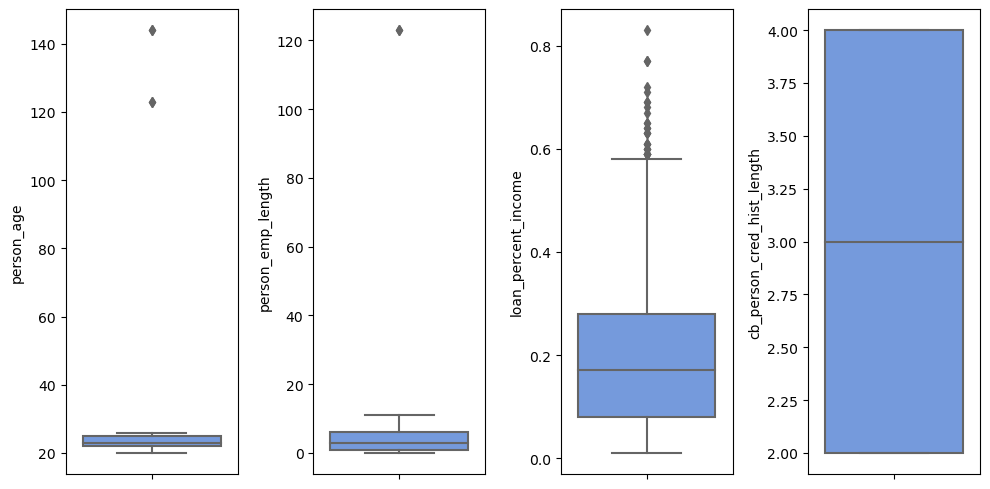

In [292]:
#We can see that the maximum age is 144 years, so probabilly it is an outlier
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

In [293]:
#Checking balance columns target
df.loan_status.value_counts()

0    2657
1    1342
Name: loan_status, dtype: int64

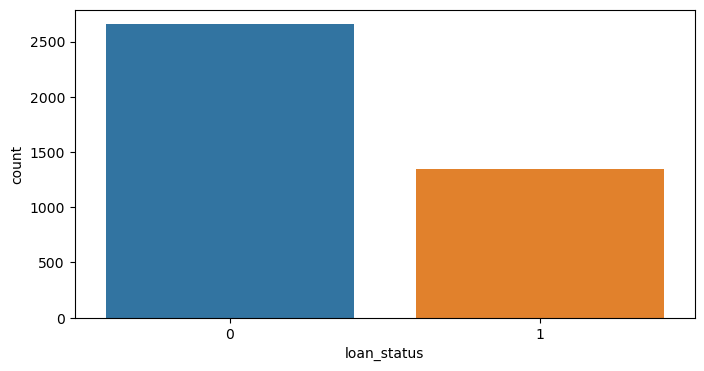

In [294]:
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status', data=df)
plt.show()

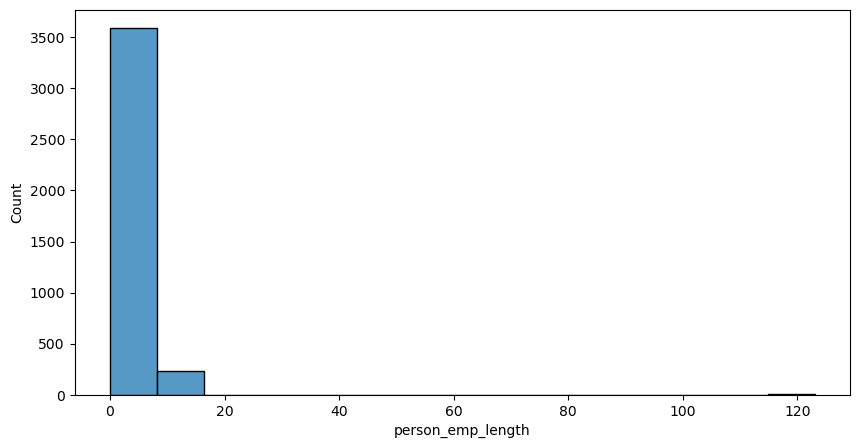

In [295]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'person_emp_length', bins=15)
plt.show()

# Analysing the correlation between variables

In [296]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
             'cb_person_cred_hist_length', 'loan_status']
credit_risk_corr = df[variables].corr()
credit_risk_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.162314,0.039377,0.065229,0.011394,-0.017112,0.007028,-0.029751
person_income,0.162314,1.000000,0.149733,0.504212,0.095082,-0.134448,0.011231,-0.132551
person_emp_length,0.039377,0.149733,1.000000,0.168183,-0.024056,0.073473,-0.001943,-0.012694
loan_amnt,0.065229,0.504212,0.168183,1.000000,0.172422,0.674022,0.009673,0.271799
loan_int_rate,0.011394,0.095082,-0.024056,0.172422,1.000000,0.076928,-0.020752,0.335381
loan_percent_income,-0.017112,-0.134448,0.073473,0.674022,0.076928,1.000000,0.001084,0.427980
cb_person_cred_hist_length,0.007028,0.011231,-0.001943,0.009673,-0.020752,0.001084,1.000000,-0.002995
loan_status,-0.029751,-0.132551,-0.012694,0.271799,0.335381,0.427980,-0.002995,1.000000


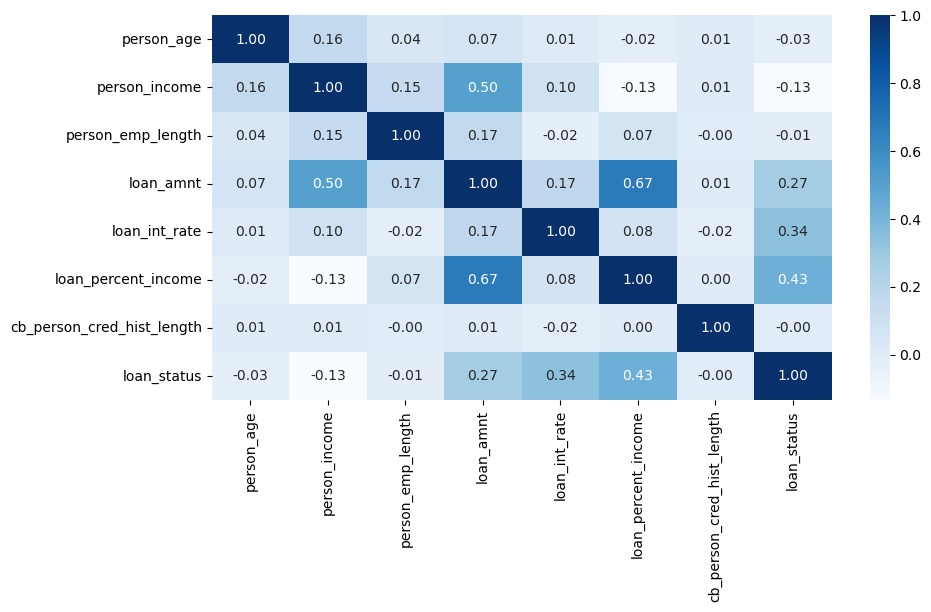

In [297]:
plt.figure(figsize=(10,5))
sns.heatmap(credit_risk_corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

# Deal with Outliers

In [298]:

df['person_age'].sort_values(ascending=False).head(10)

81      144
183     144
575     123
747     123
3998     26
3805     26
2300     26
3282     26
3286     26
2292     26
Name: person_age, dtype: int64

In [299]:
df['person_emp_length'].sort_values(ascending=False).head(10)

0       123.0
210     123.0
141      11.0
553      11.0
1176     11.0
2798     11.0
2641     11.0
3463     11.0
1281     10.0
588      10.0
Name: person_emp_length, dtype: float64

In [300]:
df['loan_percent_income'].sort_values(ascending=False).head(10)

640     0.83
571     0.77
577     0.77
460     0.72
2452    0.71
1773    0.69
535     0.69
3535    0.68
962     0.67
894     0.65
Name: loan_percent_income, dtype: float64

# Drop outliers

In [301]:
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)

In [302]:
df.loc[df['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [303]:
df.drop(df.loc[df['person_age'] >= 123].index, inplace=True)

In [304]:
df.loc[df['person_age'] >= 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


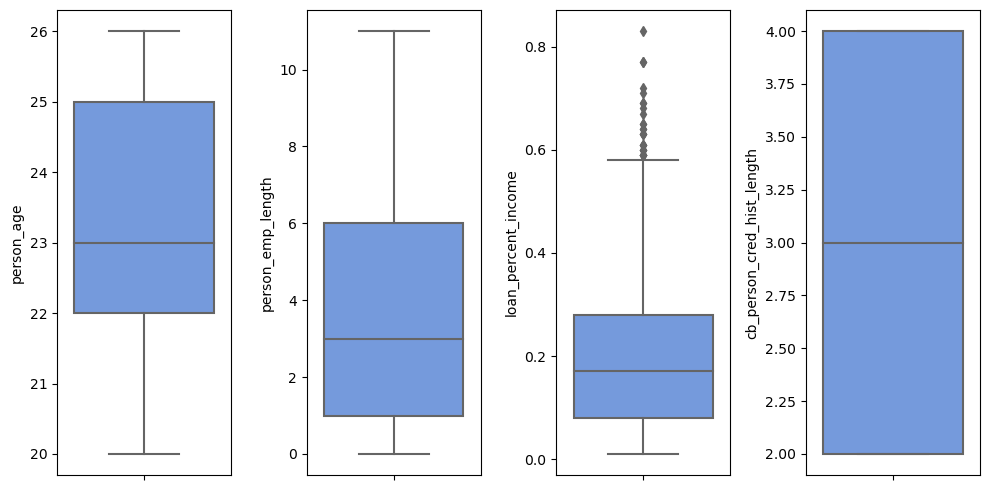

In [305]:
#Confirm there is no outliers 
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

# Deal with N/A values

In [306]:
mean_person_emp_length = df['person_emp_length'].mean()
mean_loan_int_rate = df['loan_int_rate'].mean()

In [307]:
print(f'Mean variable person_emp_length, {mean_person_emp_length} and loan_int_rate, {mean_loan_int_rate}.')

Mean variable person_emp_length, 3.6229722658294086 and loan_int_rate, 11.334900881057308.


In [308]:
#Fill na with mean
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length) 

In [309]:
df['person_emp_length'].isna().sum()

0

In [310]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_loan_int_rate) 

In [311]:
df['loan_int_rate'].isna().sum()

0

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 1 to 3998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  3993 non-null   int64  
 1   person_income               3993 non-null   int64  
 2   person_home_ownership       3993 non-null   object 
 3   person_emp_length           3993 non-null   float64
 4   loan_intent                 3993 non-null   object 
 5   loan_grade                  3993 non-null   object 
 6   loan_amnt                   3993 non-null   int64  
 7   loan_int_rate               3993 non-null   float64
 8   loan_status                 3993 non-null   int64  
 9   loan_percent_income         3993 non-null   float64
 10  cb_person_default_on_file   3993 non-null   object 
 11  cb_person_cred_hist_length  3993 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 405.5+ KB


# Transform categorical variables

In [313]:
def categorical_variables(df):
    object_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    label_encoder = LabelEncoder()
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [314]:
credit_df = categorical_variables(df)

In [315]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


In [316]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 1 to 3998
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  3993 non-null   int64  
 1   person_income               3993 non-null   int64  
 2   person_home_ownership       3993 non-null   int32  
 3   person_emp_length           3993 non-null   float64
 4   loan_intent                 3993 non-null   int32  
 5   loan_grade                  3993 non-null   int32  
 6   loan_amnt                   3993 non-null   int64  
 7   loan_int_rate               3993 non-null   float64
 8   loan_status                 3993 non-null   int64  
 9   loan_percent_income         3993 non-null   float64
 10  cb_person_default_on_file   3993 non-null   int32  
 11  cb_person_cred_hist_length  3993 non-null   int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 343.1 KB


# Applying Train_test_split

In [317]:
y = credit_df['loan_status'].values
print(y)

[0 1 1 ... 1 0 0]


In [318]:
x_df = credit_df.drop('loan_status', axis=1)
x = x_df.values
print(x)

[[2.1000e+01 9.6000e+03 2.0000e+00 ... 1.0000e-01 0.0000e+00 2.0000e+00]
 [2.5000e+01 9.6000e+03 0.0000e+00 ... 5.7000e-01 0.0000e+00 3.0000e+00]
 [2.3000e+01 6.5500e+04 3.0000e+00 ... 5.3000e-01 0.0000e+00 2.0000e+00]
 ...
 [2.3000e+01 4.8000e+04 3.0000e+00 ... 8.0000e-02 0.0000e+00 3.0000e+00]
 [2.5000e+01 5.4000e+04 3.0000e+00 ... 7.0000e-02 0.0000e+00 2.0000e+00]
 [2.6000e+01 5.4996e+04 3.0000e+00 ... 7.0000e-02 0.0000e+00 4.0000e+00]]


# Applying train_test_split to split train and test data

In [319]:
seed = 27
size = 0.3
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=size, random_state=seed)

In [320]:
print(f'X_train size {X_train.shape},X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test {y_test.shape}')

X_train size (2795, 11),X_test: (1198, 11), Y_train: (2795,), Y_test (1198,)


# Applying Normalization

In [321]:
#Transform features on a similar scale

In [335]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [336]:
#X_train scaled
X_train_norm

array([[0.66666667, 0.07210526, 1.        , ..., 0.06097561, 0.        ,
        0.        ],
       [0.16666667, 0.04534413, 0.66666667, ..., 0.7804878 , 0.        ,
        0.        ],
       [0.83333333, 0.12618084, 1.        , ..., 0.07317073, 0.        ,
        0.5       ],
       ...,
       [0.33333333, 0.09960864, 0.66666667, ..., 0.14634146, 0.        ,
        1.        ],
       [0.33333333, 0.06477733, 1.        , ..., 0.15853659, 0.        ,
        0.        ],
       [0.33333333, 0.24618758, 1.        , ..., 0.25609756, 0.        ,
        0.        ]])

In [337]:
#X_test scaled
X_test_norm

array([[0.83333333, 0.02834008, 1.        , ..., 0.25609756, 1.        ,
        1.        ],
       [0.33333333, 0.10255061, 1.        , ..., 0.32926829, 0.        ,
        0.        ],
       [0.5       , 0.28812416, 1.        , ..., 0.24390244, 1.        ,
        0.        ],
       ...,
       [1.        , 0.05533063, 0.        , ..., 0.54878049, 0.        ,
        0.5       ],
       [0.83333333, 0.11740891, 1.        , ..., 0.04878049, 1.        ,
        0.5       ],
       [0.83333333, 0.07287449, 0.        , ..., 0.08536585, 1.        ,
        1.        ]])

#  Machine Learning Model Trainning

# Logistic Regression


In [353]:
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train_norm, Y_train)
score = modelo.score(X_train_norm, Y_train)
print('Accuracy train data: %.2f%%' % (score * 100))

Accuracy train data: 80.64%


In [403]:
predict = modelo.predict(X_test_norm)
predict

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [356]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[727  76]
 [ 78 317]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       803
           1       0.81      0.80      0.80       395

    accuracy                           0.87      1198
   macro avg       0.85      0.85      0.85      1198
weighted avg       0.87      0.87      0.87      1198

Logistic Regression accuracy:  0.8714524207011686


#  Using the SMOTE algoritm to balance the class

In [399]:
print('Distribution target class before oversample: ', Counter(Y_train))

Distribution target class before oversample:  Counter({0: 1849, 1: 946})


In [400]:
oversample= SMOTE(sampling_strategy=1, random_state=42, k_neighbors=3)
X_train_over, Y_train_over = oversample.fit_resample(X_train_norm, Y_train)
print('Distribuition target class after oversample: ', Counter(Y_train_over))

Distribuition target class after oversample:  Counter({1: 1849, 0: 1849})


In [401]:
#Trainning model with oversmaple examples
modelo.fit(X_train_over, Y_train_over)
score = modelo.score(X_train_over, Y_train_over)
print('Accuracy train oversample data: %.2f%%' % (score * 100))

Accuracy train oversample data: 78.77%


In [1]:
predict_over = modelo.predict(X_test_norm)

NameError: name 'modelo' is not defined

# Score with oversample

In [362]:
accuracy_oversample = accuracy_score(y_test, predict_over)
precision_oversample = precision_score(y_test, predict_over)
recall_oversample = recall_score(y_test, predict_over)
f1_score_oversample = f1_score(y_test, predict_over)

print('Accuracy predict: %.2f%%' % (accuracy_oversample * 100.0))
print('Precision: %.2f%%' % (precision_oversample * 100.0))
print('Recall: %.2f%%' % (recall_oversample * 100.0))
print('F1_score: %.2f%%' % (f1_score_oversample * 100.0))

Accuracy predict: 76.71%
Precision: 61.37%
Recall: 79.24%
F1_score: 69.17%


# Confusion Matrix after oversample

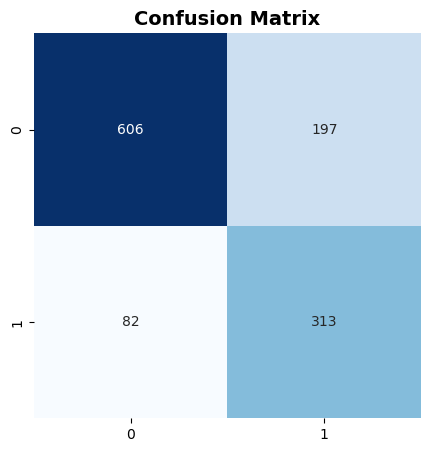

In [363]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,predict_over), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

# Decision Tree

In [364]:
from sklearn.tree import DecisionTreeClassifier

In [365]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, Y_train.ravel())

DecisionTreeClassifier()

In [366]:
y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

[[728  75]
 [ 72 323]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       803
           1       0.81      0.82      0.81       395

    accuracy                           0.88      1198
   macro avg       0.86      0.86      0.86      1198
weighted avg       0.88      0.88      0.88      1198

Decision Tree accuracy:  0.88


In [367]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from graphviz import Digraph

In [368]:
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent',
            'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

In [369]:
X_plot_tree = df[features]

In [370]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
8,loan_percent_income,0.294455
1,person_income,0.194457
5,loan_grade,0.146484
2,person_home_ownership,0.123895
7,loan_int_rate,0.064159
4,loan_intent,0.054857
3,person_emp_length,0.040357
6,loan_amnt,0.033257
0,person_age,0.023247
10,cb_person_cred_hist_length,0.018849


<AxesSubplot:ylabel='FeatureName'>

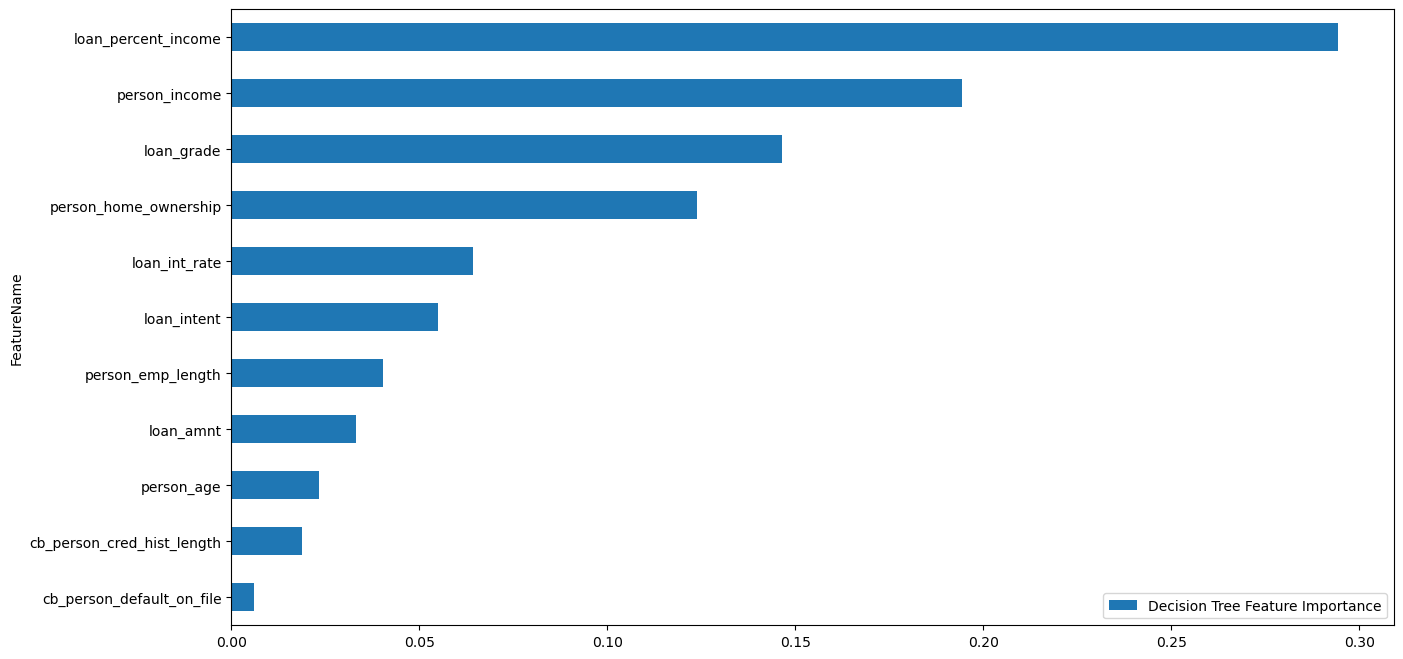

In [371]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

In [372]:
from sklearn import tree
DT_classifier2 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=20)
DT_classifier2.fit(X_train, Y_train.ravel())

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [373]:
y_prob_train_dt2 = DT_classifier2.predict_proba(X_train)
y_pred_train_dt2 = DT_classifier2.predict(X_train)
df_report = pd.DataFrame({'Y observed':Y_train.ravel(), 'Y classification':y_pred_train_dt2.ravel(), 'Y probability':y_prob_train_dt2[:,1]})
df_report

,Y observed,Y classification,Y probability
0,1,1,1.000000
1,0,0,0.132231
2,0,0,0.052820
3,0,0,0.052820
4,1,1,1.000000
...,...,...,...
2790,0,0,0.052820
2791,0,0,0.150338
2792,0,0,0.052820
2793,0,0,0.150338


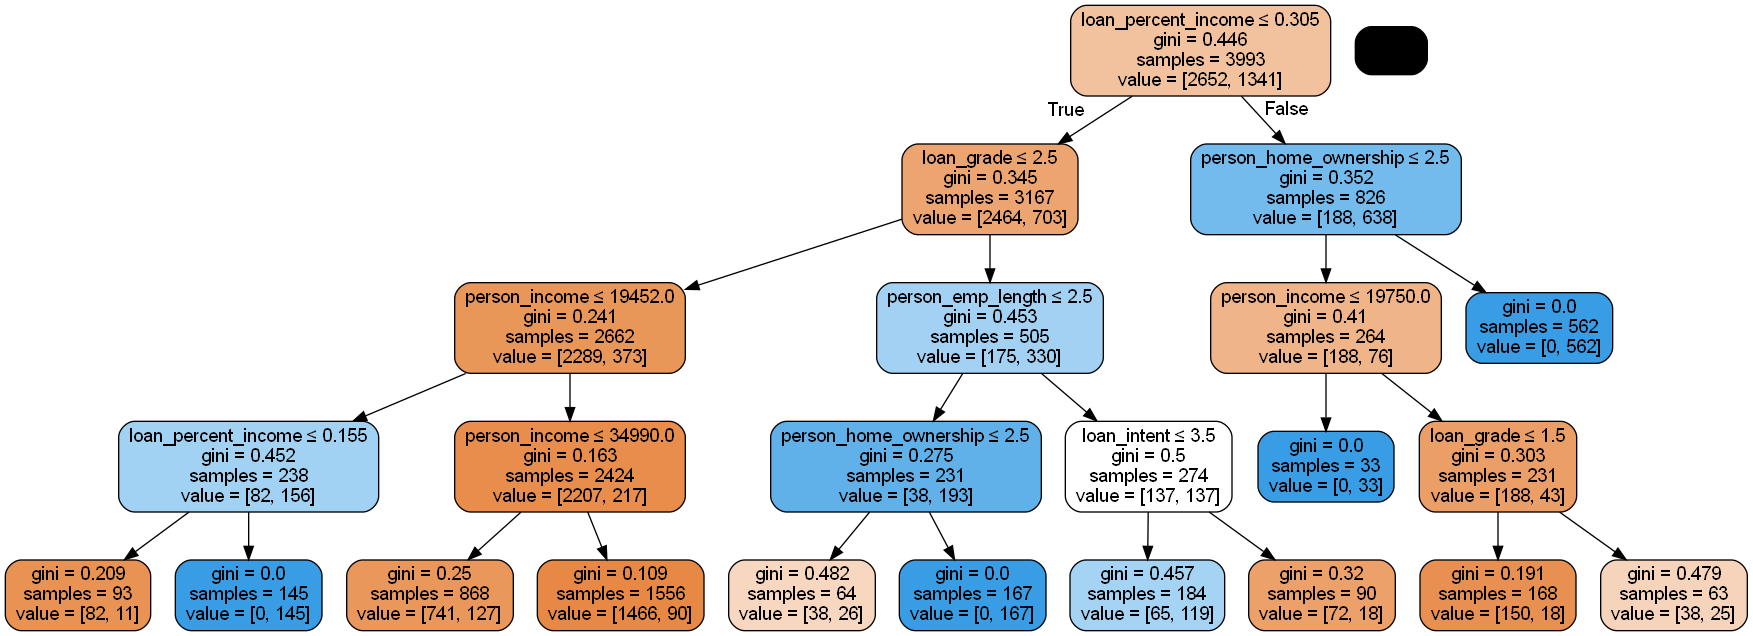

In [374]:
dot_data = StringIO()

clf = DT_classifier2
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data, feature_names = features, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [375]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: person_age
X_1: person_income
X_2: person_home_ownership
X_3: person_emp_length
X_4: loan_intent
X_5: loan_grade
X_6: loan_amnt
X_7: loan_int_rate
X_8: loan_percent_income
X_9: cb_person_default_on_file
X_10: cb_person_cred_hist_length


# 

# Random Forest 
- Random Forest could be a better choice because it has a good handle with overfitting problem.
- The number of th decision trees participating in the process could have a high accurate.

In [376]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train.ravel())

RandomForestClassifier()

In [377]:
Y_predict_clf = clf.predict(X_test)
print(confusion_matrix(y_test,Y_predict_clf))
print(classification_report(y_test,Y_predict_clf))
print('Random Forest accuracy: ', round(accuracy_score(y_test, Y_predict_clf),2))

[[759  44]
 [ 80 315]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       803
           1       0.88      0.80      0.84       395

    accuracy                           0.90      1198
   macro avg       0.89      0.87      0.88      1198
weighted avg       0.90      0.90      0.90      1198

Random Forest accuracy:  0.9


In [378]:
importance_rf = clf.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 
                                        'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
8,loan_status,0.266830
1,person_income,0.187215
7,loan_int_rate,0.118540
6,loan_amnt,0.106352
5,loan_grade,0.099015
2,person_home_ownership,0.063257
3,person_emp_length,0.052078
4,loan_intent,0.045409
0,person_age,0.030712
10,cb_person_default_on_file,0.019374


# XGB Classifier

In [379]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_roc_curve

In [380]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, Y_train.ravel())
Y_predict_XGB_classifier = XGB_classifier.predict(X_test)

In [381]:
accuracy = accuracy_score(y_test, Y_predict_XGB_classifier)
precision = precision_score(y_test, Y_predict_XGB_classifier)
recall = recall_score(y_test, Y_predict_XGB_classifier)
fscore = f1_score(y_test, Y_predict_XGB_classifier)

print(confusion_matrix(y_test,Y_predict_XGB_classifier))
print(classification_report(y_test,Y_predict_XGB_classifier))
print('XGB accuracy: ', round(accuracy_score(y_test, Y_predict_XGB_classifier),2))

[[766  37]
 [ 69 326]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       803
           1       0.90      0.83      0.86       395

    accuracy                           0.91      1198
   macro avg       0.91      0.89      0.90      1198
weighted avg       0.91      0.91      0.91      1198

XGB accuracy:  0.91


In [382]:
importance_rf = XGB_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 
                                        'XGBoost Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
5,loan_grade,0.278738
2,person_home_ownership,0.241666
8,loan_status,0.190662
1,person_income,0.069452
4,loan_intent,0.054319
3,person_emp_length,0.034613
0,person_age,0.032096
6,loan_amnt,0.027378
7,loan_int_rate,0.026853
10,cb_person_default_on_file,0.022421


# Resampling

In [383]:
#classify target variables and attributes
target = ['loan_status']
features = list(set(list(df.columns)) - set(target))

print('Target: ', target)
print('Features: ', features)

Target:  ['loan_status']
Features:  ['person_emp_length', 'cb_person_cred_hist_length', 'person_age', 'loan_percent_income', 'loan_intent', 'loan_grade', 'loan_int_rate', 'loan_amnt', 'person_income', 'person_home_ownership', 'cb_person_default_on_file']


In [384]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [385]:
from sklearn.model_selection import cross_val_score

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

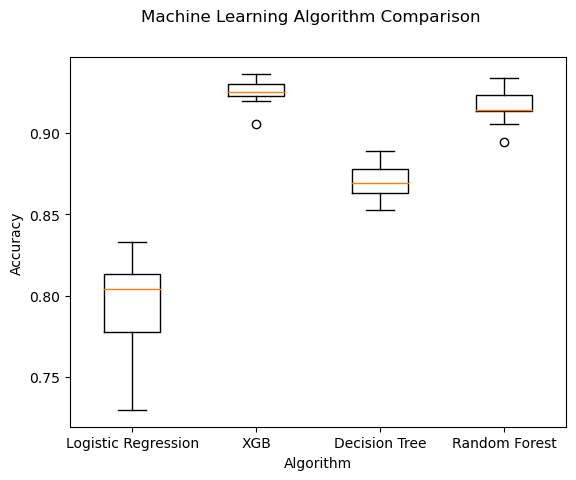

In [386]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('XGB', XGBClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

# 1. Over sampling

In [387]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [388]:
X_train_over 

,person_emp_length,cb_person_cred_hist_length,person_age,loan_percent_income,loan_intent,loan_grade,loan_int_rate,loan_amnt,person_income,person_home_ownership,cb_person_default_on_file
0,3.000000,2,22,0.270000,1,2,13.490000,8000,30000,2,0
1,3.622972,3,22,0.170000,1,1,10.000000,5125,30000,2,0
2,6.000000,2,22,0.070000,3,3,15.620000,2500,35500,3,0
3,0.000000,2,22,0.030000,0,2,13.980000,1000,35100,3,0
4,7.000000,3,23,0.360000,0,1,11.990000,16750,46272,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4817,3.519007,3,22,0.266662,0,2,15.819384,8833,32950,0,1
4818,1.475595,2,24,0.080000,2,2,14.261867,2000,24000,3,0
4819,1.387674,2,23,0.313877,2,2,13.425526,10155,32032,1,0
4820,0.000000,3,24,0.310000,2,2,10.946695,20000,64402,3,0


In [389]:
y_train_over

,loan_status
0,0
1,0
2,1
3,0
4,1
...,...
4817,1
4818,1
4819,1
4820,1


In [390]:
y_train_over.value_counts()

loan_status
0              2411
1              2411
dtype: int64

In [391]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[193  48]
 [ 42 117]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       241
           1       0.71      0.74      0.72       159

    accuracy                           0.78       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400

Logistic Regression accuracy:  0.775


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# 2. Under Sampling

In [392]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [393]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [394]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [395]:
X_train_under

,person_emp_length,cb_person_cred_hist_length,person_age,loan_percent_income,loan_intent,loan_grade,loan_int_rate,loan_amnt,person_income,person_home_ownership,cb_person_default_on_file
0,7.0,3,23,0.03,1,0,7.90,1000,28600,3,0
1,9.0,3,25,0.29,0,1,12.42,10000,34000,0,0
2,5.0,4,21,0.12,3,1,11.49,2400,20400,2,0
3,1.0,3,26,0.04,3,2,14.65,1000,25000,3,1
4,5.0,3,21,0.10,5,2,13.49,3375,33000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
2677,6.0,4,22,0.09,2,0,5.99,4000,44582,3,0
2678,0.0,4,24,0.09,0,3,15.99,4000,45000,3,0
2679,0.0,3,23,0.09,0,4,19.29,4000,45630,3,1
2680,9.0,3,25,0.09,0,3,16.32,4000,46392,3,1


In [396]:
y_train_under

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
2677,1
2678,1
2679,1
2680,1


In [397]:
y_train_under.value_counts()

loan_status
0              1341
1              1341
dtype: int64

In [398]:
classifier = LogisticRegression()
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred_train_under = classifier.predict(X_train_under)
print(confusion_matrix(y_train_under,y_pred_train_under))
print(classification_report(y_train_under,y_pred_train_under))
print('Logistic Regression accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

[[ 985  356]
 [ 318 1023]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1341
           1       0.74      0.76      0.75      1341

    accuracy                           0.75      2682
   macro avg       0.75      0.75      0.75      2682
weighted avg       0.75      0.75      0.75      2682

Logistic Regression accuracy:  0.7486950037285608


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
`